<a href="https://colab.research.google.com/github/jonahyuan/AI-learning/blob/main/6_20Cluster_pratice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
import pandas as pd 
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
df.to_csv("iris.csv", encoding="utf-8", index=False)
df

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris["data"], iris["target"], test_size=0.1)

In [4]:
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3)
clu.fit(x_train)

KMeans(n_clusters=3)

In [5]:
clu.labels_

array([2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2,
       1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2, 1,
       0, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2,
       1, 2, 0], dtype=int32)

In [ ]:
pre = clu.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(pre, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))

In [ ]:
from sklearn.metrics import silhouette_score
x = df.drop(["target"],axis=1)
plotx = []
ploty = []
for k in range(2, 6):
  clu = KMeans(n_clusters=k)
  clu.fit(x)
  s = silhouette_score(x, clu.labels_)
  plotx.append(k)
  ploty.append(s)
print("K值:", plotx)
print("Score:", ploty)

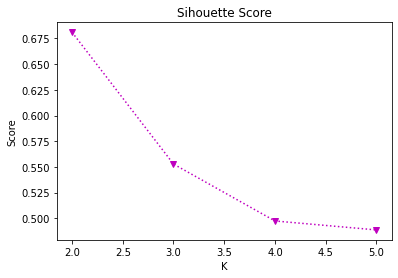

In [15]:
import matplotlib.pyplot as plt
plt.title("Sihouette Score")
plt.xlabel("K")
plt.ylabel("Score")
plt.plot(plotx, ploty, "mv:")